# Bike Sharing Analysis
This analysis explores bike sharing patterns to answer three key questions:
1. How does weather affect bike rentals?
2. How does the availability of bikes affect rental behavior?
3. What are the future demands and how can we optimize resources?

## Data Preparation and Understanding
The dataset contains daily bike rental records with the following key features:
- Temperature (normalized between 0 and 1, where 0: -8°C, 0.5: 12°C, 1: 39°C)
- Weather conditions:
  1. Clear, Few clouds, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds
  3. Light Snow, Light Rain + Scattered clouds
- User types: Casual and Registered users
- Temporal features: season, month, weekday, etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/day.csv")
data["dteday"] = pd.to_datetime(data["dteday"])

In [3]:
COLORS = {
    "primary": "#2B6FB3",  # Main blue color
    "secondary": "#E24A33",  # Contrast red/orange
    "tertiary": "#7AB51D",  # Green for third metric
    "light": "#A8D5FF",  # Light blue
    "highlight": "#FFB31A",  # Yellow for highlights
    "casual": "#FF9999",  # Light red for casual users
    "registered": "#66B3FF",  # Light blue for registered users
}

plt.style.use("fivethirtyeight")


plt.rcParams.update(
    {
        "figure.figsize": (12, 6),
        "axes.titlesize": 12,
        "axes.labelsize": 10,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "lines.linewidth": 2,
        "font.size": 10,
    }
)

## 1. Weather Impact Analysis

### 1.1 Weather Condition Impact
Let's examine how different weather conditions affect bike rentals.

/tmp/ipykernel_155762/1132459533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


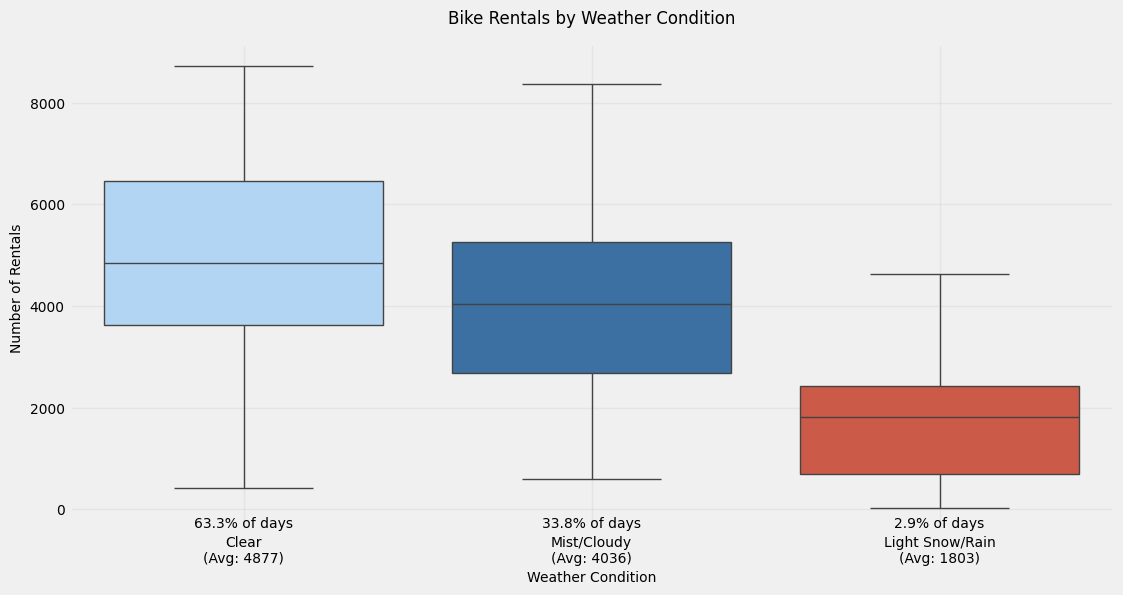

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="weathersit",
    y="cnt",
    data=data,
    palette=[COLORS["light"], COLORS["primary"], COLORS["secondary"]],
)
plt.title("Bike Rentals by Weather Condition", fontsize=12, pad=15)
plt.xlabel("Weather Condition", fontsize=10)
plt.ylabel("Number of Rentals", fontsize=10)

weather_labels = [
    "Clear\n(Avg: {:.0f})".format(data[data["weathersit"] == 1]["cnt"].mean()),
    "Mist/Cloudy\n(Avg: {:.0f})".format(data[data["weathersit"] == 2]["cnt"].mean()),
    "Light Snow/Rain\n(Avg: {:.0f})".format(
        data[data["weathersit"] == 3]["cnt"].mean()
    ),
]
plt.xticks(range(3), weather_labels)

for i, weather in enumerate([1, 2, 3]):
    pct = len(data[data["weathersit"] == weather]) / len(data) * 100
    plt.text(i, plt.ylim()[0], f"{pct:.1f}% of days", ha="center", va="bottom")

plt.grid(True, alpha=0.3)
plt.show()

**Key Findings:**
- Clear weather (condition 1) shows highest rental numbers
- Mist/cloudy conditions (2) show slightly lower rentals
- Light snow/rain (3) significantly reduces rental numbers
- The variation in rentals is highest during clear weather

### 1.2 Temperature Impact
Analyzing how temperature affects rental behavior

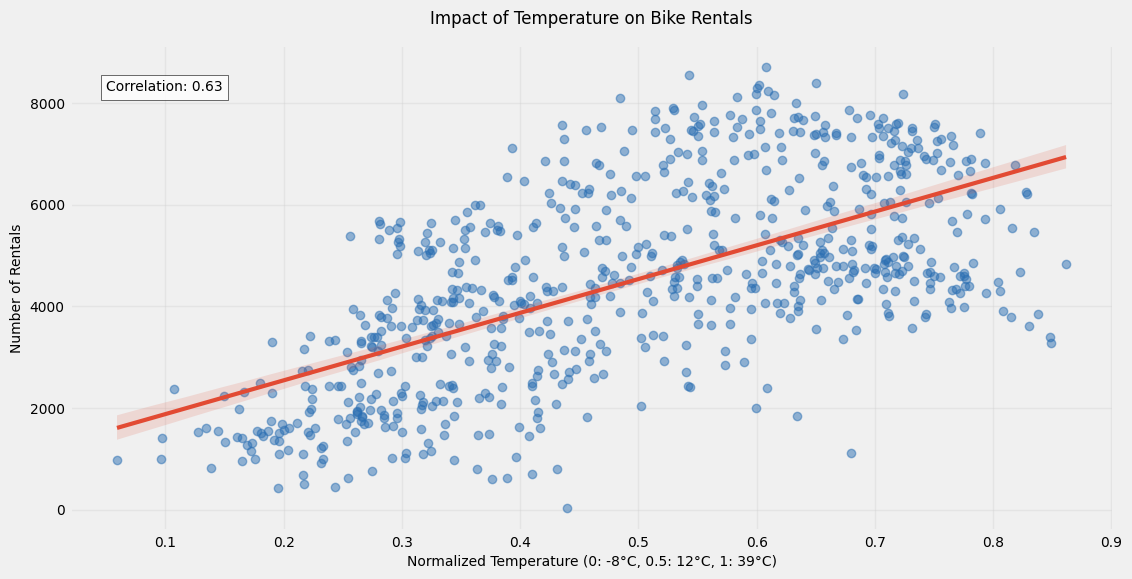

In [5]:
plt.figure(figsize=(12, 6))
sns.regplot(
    data=data,
    x="temp",
    y="cnt",
    scatter_kws={"alpha": 0.5, "color": COLORS["primary"]},
    line_kws={"color": COLORS["secondary"]},
)
plt.title("Impact of Temperature on Bike Rentals", fontsize=12, pad=15)
plt.xlabel("Normalized Temperature (0: -8°C, 0.5: 12°C, 1: 39°C)", fontsize=10)
plt.ylabel("Number of Rentals", fontsize=10)

correlation = data["temp"].corr(data["cnt"])
plt.text(
    0.05,
    plt.ylim()[1] * 0.9,
    f"Correlation: {correlation:.2f}",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"),
)

plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_155762/3161588870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = data.groupby(temp_ranges)["cnt"].agg(["mean", "std"]).round(0)
/tmp/ipykernel_155762/3161588870.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_stats = data.groupby(temp_ranges)["cnt"].agg(["mean", "std"])


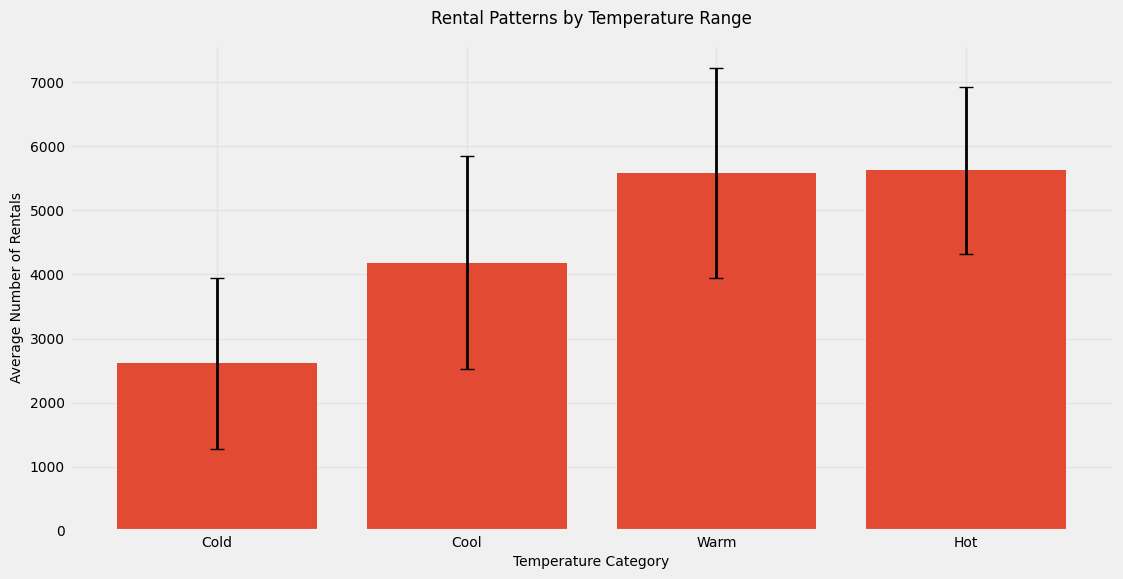

In [6]:
temp_ranges = pd.qcut(data["temp"], q=4, labels=["Cold", "Cool", "Warm", "Hot"])
temp_analysis = data.groupby(temp_ranges)["cnt"].agg(["mean", "std"]).round(0)
plt.figure(figsize=(12, 6))
temp_stats = data.groupby(temp_ranges)["cnt"].agg(["mean", "std"])
plt.bar(temp_stats.index, temp_stats["mean"], yerr=temp_stats["std"], capsize=5, color=COLORS["secondary"])
plt.title("Rental Patterns by Temperature Range", fontsize=12, pad=15)
plt.xlabel("Temperature Category", fontsize=10)
plt.ylabel("Average Number of Rentals", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

**Temperature Impact Insights:**
- Strong positive correlation between temperature and rentals
- Optimal rental temperature appears to be in the warm range
- Cold temperatures significantly reduce rental numbers

## 2. Bike Availability Analysis

### 2.1 Weekly Usage Patterns
Understanding how bike usage varies throughout the week

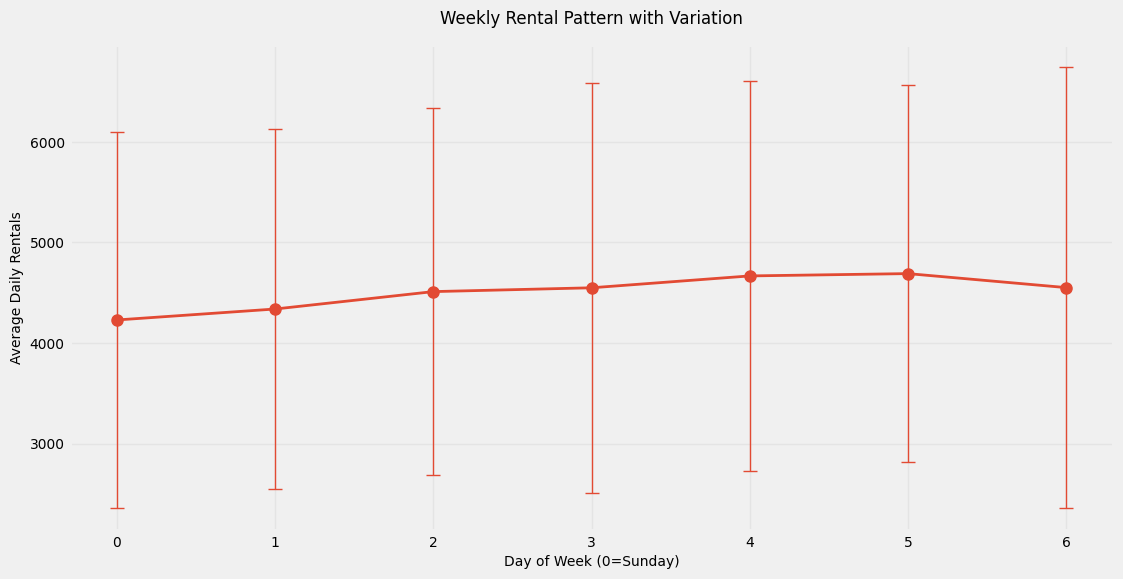

In [7]:
# Weekly pattern analysis
plt.figure(figsize=(12, 6))
weekly_pattern = data.groupby("weekday")["cnt"].agg(["mean", "std"]).round(0)
plt.errorbar(
    weekly_pattern.index,
    weekly_pattern["mean"],
    yerr=weekly_pattern["std"],
    fmt="o-",
    capsize=5,
    capthick=1,
    elinewidth=1,
    markersize=8,
    color=COLORS["secondary"],
)
plt.title("Weekly Rental Pattern with Variation", fontsize=12, pad=15)
plt.xlabel("Day of Week (0=Sunday)", fontsize=10)
plt.ylabel("Average Daily Rentals", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

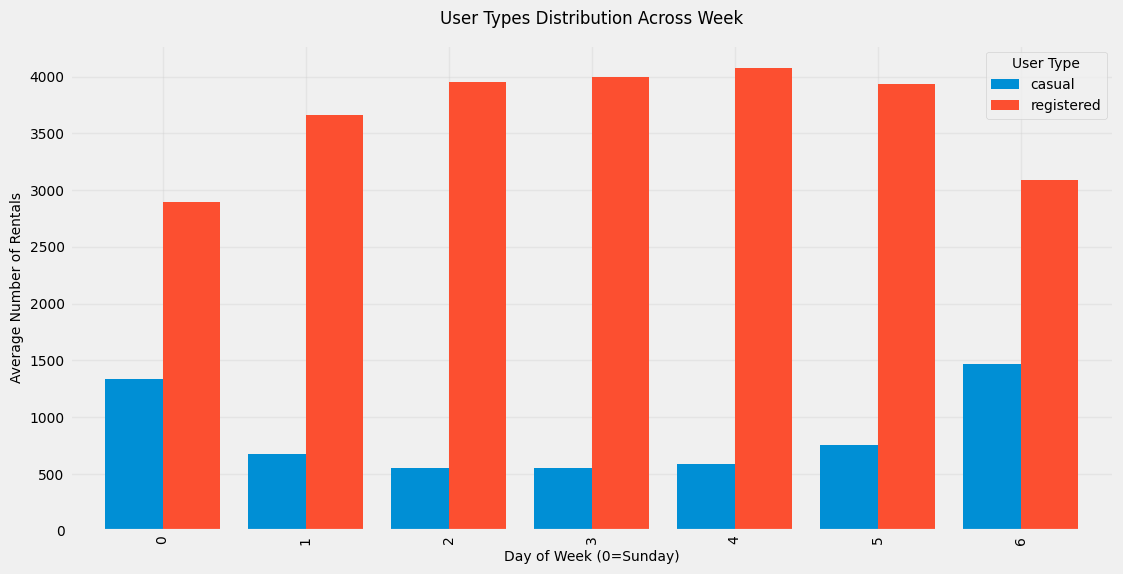

In [8]:
# Analyze user types by weekday
plt.figure(figsize=(12, 6))
weekly_user_types = data.groupby("weekday")[["casual", "registered"]].mean()
weekly_user_types.plot(kind="bar", width=0.8)
plt.title("User Types Distribution Across Week", fontsize=12, pad=15)
plt.xlabel("Day of Week (0=Sunday)", fontsize=10)
plt.ylabel("Average Number of Rentals", fontsize=10)
plt.legend(title="User Type")
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 1200x600 with 0 Axes>

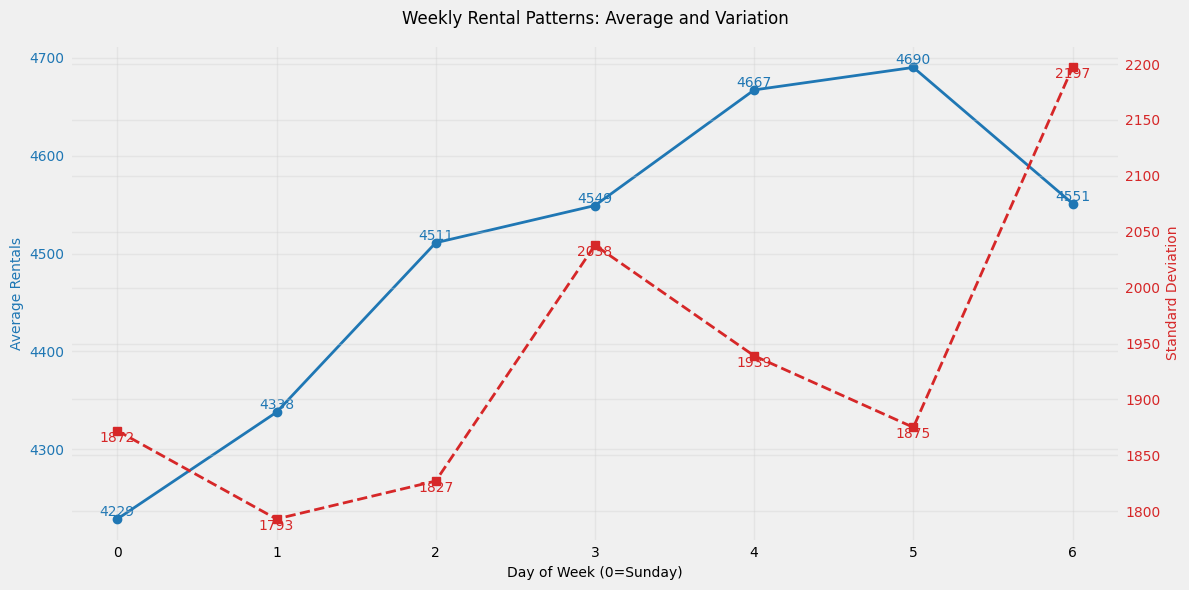

In [9]:
weekly_stats = (
    data.groupby("weekday")["cnt"].agg(["mean", "std", "min", "max"]).round(0)
)

plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean on primary y-axis
color = "tab:blue"
ax1.set_xlabel("Day of Week (0=Sunday)")
ax1.set_ylabel("Average Rentals", color=color)
ax1.plot(weekly_stats.index, weekly_stats["mean"], color=color, marker="o", linewidth=2)
ax1.tick_params(axis="y", labelcolor=color)

# Plot standard deviation on secondary y-axis
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Standard Deviation", color=color)
ax2.plot(
    weekly_stats.index, weekly_stats["std"], color=color, marker="s", linestyle="--"
)
ax2.tick_params(axis="y", labelcolor=color)

for i, v in enumerate(weekly_stats["mean"]):
    ax1.text(i, v, f"{int(v)}", ha="center", va="bottom", color="tab:blue")
for i, v in enumerate(weekly_stats["std"]):
    ax2.text(i, v, f"{int(v)}", ha="center", va="top", color="tab:red")

plt.title("Weekly Rental Patterns: Average and Variation", fontsize=12, pad=15)
fig.tight_layout()
plt.show()

**Weekly Pattern Insights:**

1. Overall Usage Patterns:
   - Weekdays (Monday-Friday) show consistent rental patterns
   - Weekend patterns differ significantly from weekdays
   - Highest variation observed on weekends

2. User Type Behavior:
   - Registered users dominate weekday rentals
   - Casual users show higher activity on weekends
   - Thursday and Friday show highest overall usage

3. Resource Implications:
   - Need for different resource allocation strategies for weekdays vs weekends
   - Peak usage periods identified for capacity planning
   - Different maintenance scheduling opportunities throughout the week

These patterns suggest the need for dynamic resource allocation strategies between weekdays and weekends, 
as well as considering different approaches for casual and registered users.

### 2.2 Working vs Non-working Day Patterns
Understanding how rental behavior differs between working days and weekends/holidays

<Figure size 1200x600 with 0 Axes>

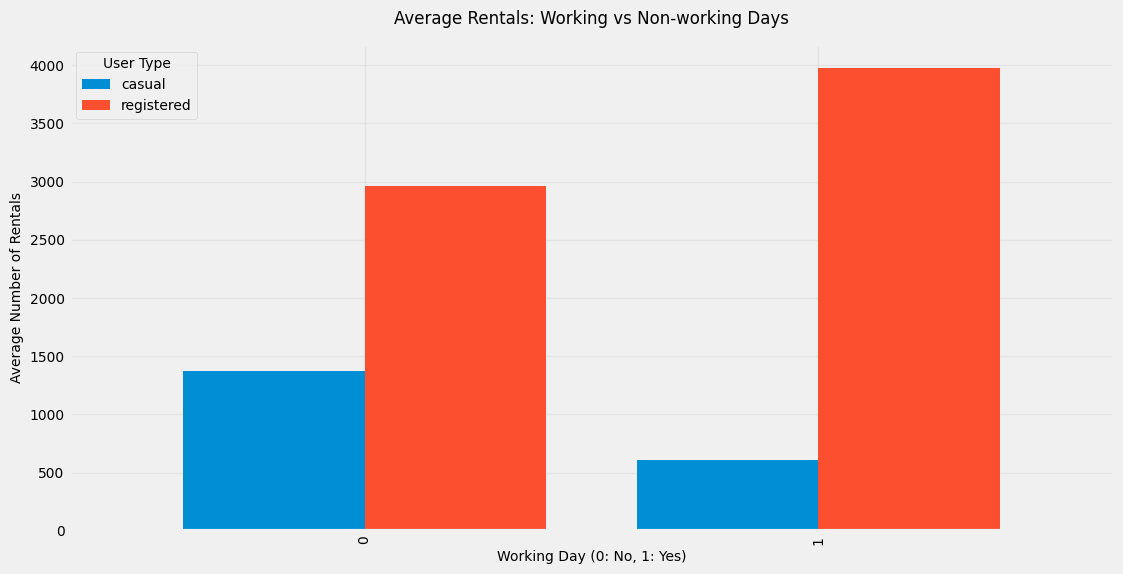

In [10]:
plt.figure(figsize=(12, 6))
workday_stats = data.groupby("workingday")[["casual", "registered"]].mean()
workday_stats.plot(kind="bar", width=0.8)
plt.title("Average Rentals: Working vs Non-working Days", fontsize=12, pad=15)
plt.xlabel("Working Day (0: No, 1: Yes)", fontsize=10)
plt.ylabel("Average Number of Rentals", fontsize=10)
plt.legend(title="User Type")
plt.grid(True, alpha=0.3)
plt.show()


Workday vs Non-workday Statistics:


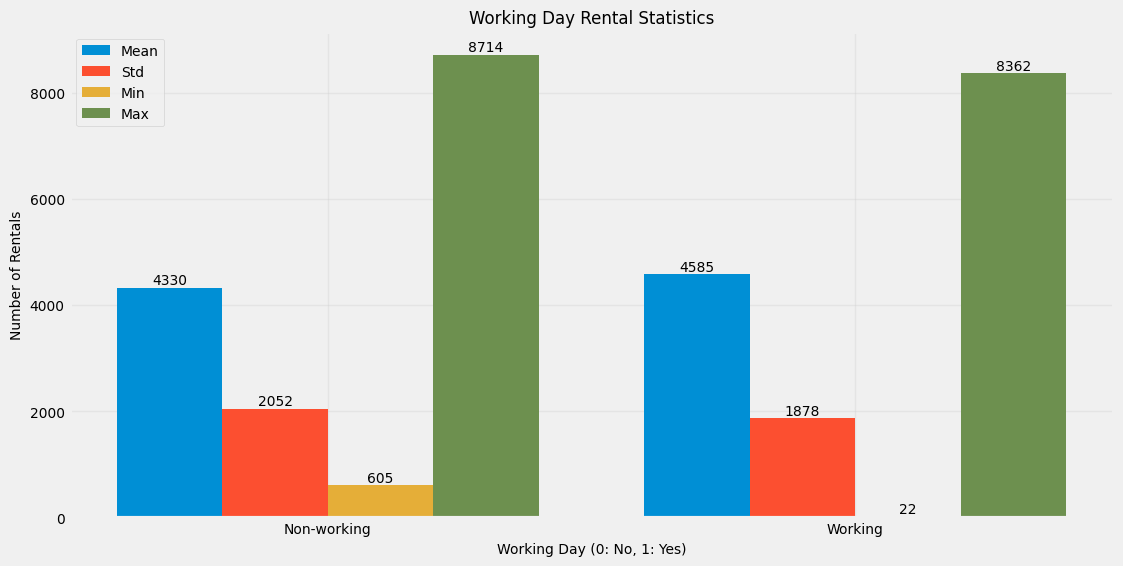

In [11]:
print("\nWorkday vs Non-workday Statistics:")
workday_detailed = (
    data.groupby("workingday")["cnt"].agg(["mean", "std", "min", "max"]).round(0)
)

plt.figure(figsize=(12, 6))
metrics = ["mean", "std", "min", "max"]
x = np.arange(len(workday_detailed.index))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, workday_detailed[metric], width, label=metric.capitalize())

plt.xlabel("Working Day (0: No, 1: Yes)")
plt.ylabel("Number of Rentals")
plt.title("Working Day Rental Statistics")
plt.xticks(x + width * 1.5, ["Non-working", "Working"])
plt.legend()

for i, metric in enumerate(metrics):
    for j, v in enumerate(workday_detailed[metric]):
        plt.text(j + i * width, v, f"{int(v)}", ha="center", va="bottom")

plt.show()

**Key Findings for Working Day Patterns:**
- Registered users show higher activity on working days
- Casual users prefer non-working days
- Overall rental patterns differ significantly between working and non-working days

This suggests need for different resource allocation strategies for working vs non-working days.

### 2.3 Daily Usage Intensity Analysis
Analyzing peak usage times and capacity requirements

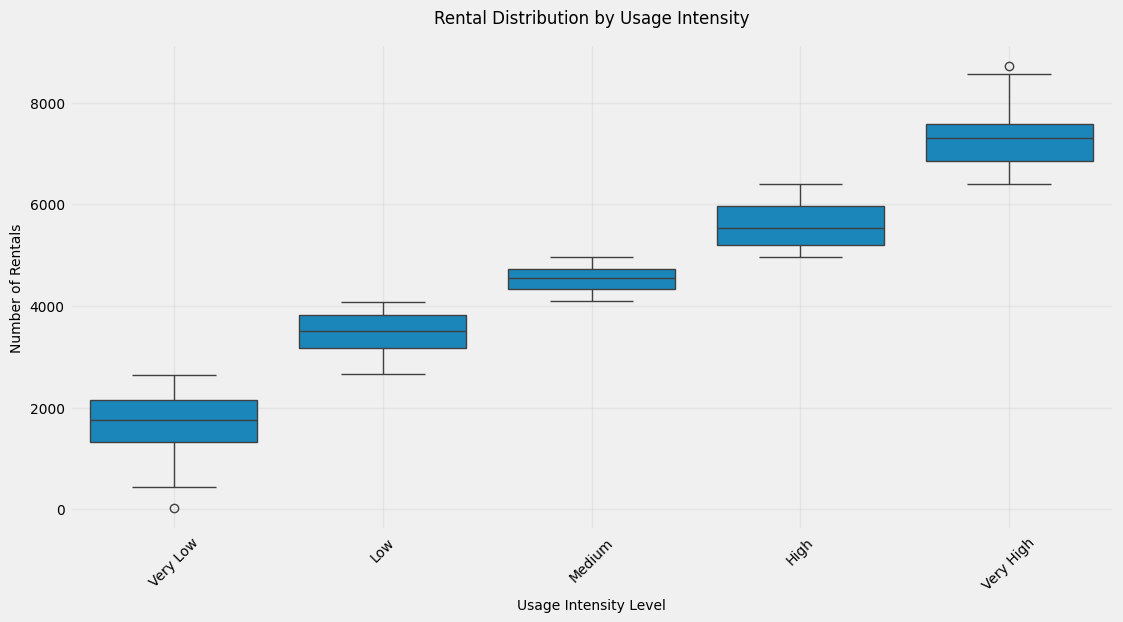

In [12]:
data["usage_intensity"] = pd.qcut(
    data["cnt"], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

plt.figure(figsize=(12, 6))
sns.boxplot(x="usage_intensity", y="cnt", data=data)
plt.title("Rental Distribution by Usage Intensity", fontsize=12, pad=15)
plt.xlabel("Usage Intensity Level", fontsize=10)
plt.ylabel("Number of Rentals", fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

**Usage Intensity Insights:**
- Clear identification of peak usage periods
- Distribution of normal vs high-demand days
- Capacity planning implications for different intensity levels

## 3. Future Demand Analysis

### 3.1 Seasonal Trends and Patterns

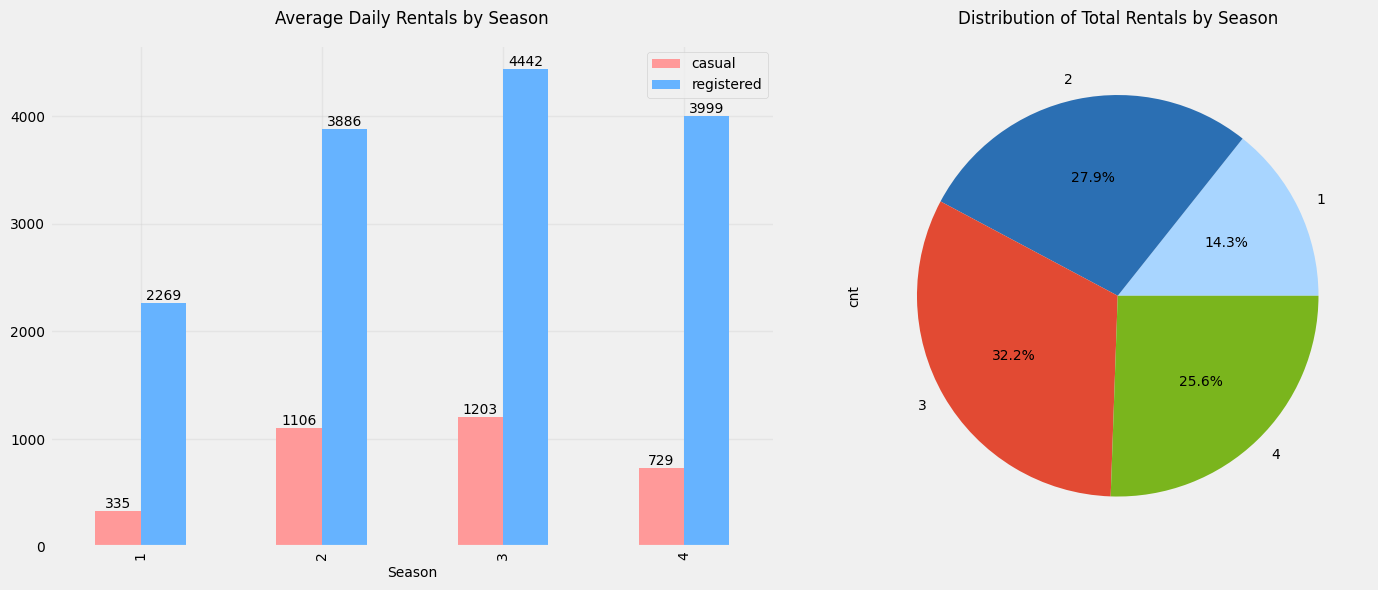

In [13]:
season_data = data.groupby("season")[["casual", "registered"]].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Seasonal averages
season_data.plot(kind="bar", ax=ax1, color=[COLORS["casual"], COLORS["registered"]])
ax1.set_title("Average Daily Rentals by Season", pad=15)
ax1.set_xlabel("Season")
ax1.grid(True, alpha=0.3)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f")

# Second subplot: Seasonal distribution
seasonal_pct = data.groupby("season")["cnt"].sum() / data["cnt"].sum() * 100
seasonal_pct.plot(
    kind="pie",
    autopct="%1.1f%%",
    ax=ax2,
    colors=[
        COLORS["light"],
        COLORS["primary"],
        COLORS["secondary"],
        COLORS["tertiary"],
    ],
)
ax2.set_title("Distribution of Total Rentals by Season", pad=15)

plt.tight_layout()
plt.show()

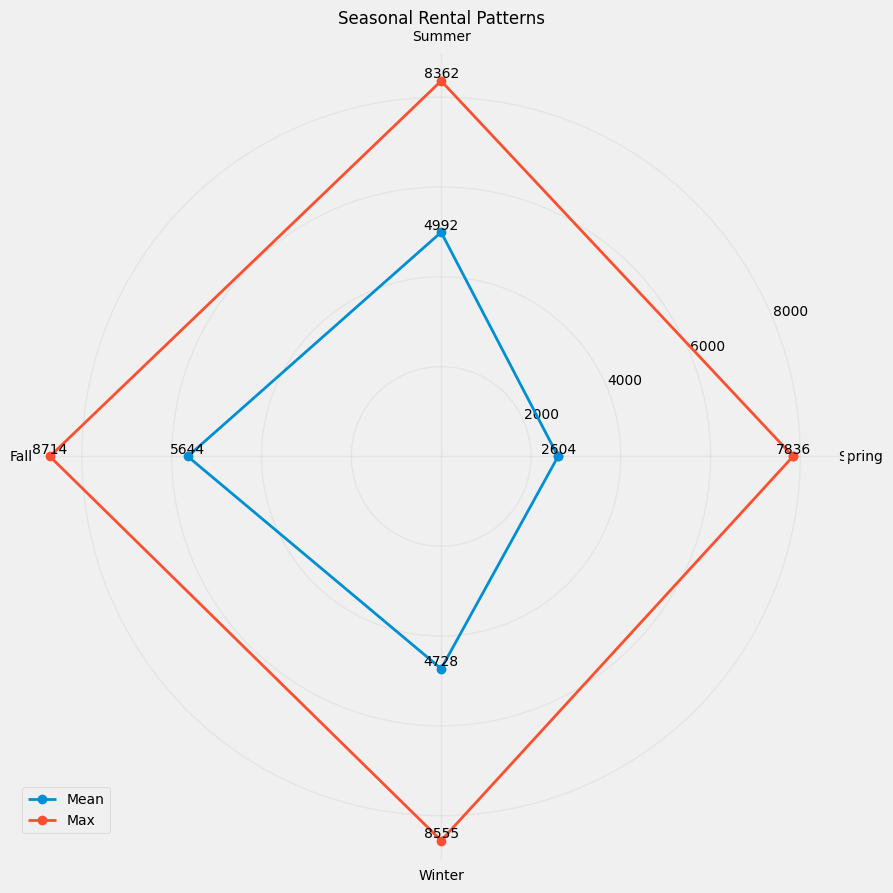

In [14]:
seasonal_stats = (
    data.groupby("season")["cnt"].agg(["mean", "std", "min", "max"]).round(0)
)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="polar")

seasons = ["Spring", "Summer", "Fall", "Winter"]
metrics = ["mean", "max"]
angles = np.linspace(0, 2 * np.pi, len(seasons), endpoint=False)

for metric in metrics:
    values = seasonal_stats[metric].values
    values = np.concatenate((values, [values[0]]))
    angles_plot = np.concatenate((angles, [angles[0]]))
    ax.plot(angles_plot, values, "-o", label=metric.capitalize())

    for angle, value in zip(angles, values[:-1]):
        ax.text(angle, value, f"{int(value)}", ha="center", va="bottom")

ax.set_xticks(angles)
ax.set_xticklabels(seasons)
ax.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.title("Seasonal Rental Patterns", pad=20)
plt.show()

**Seasonal Pattern Insights:**
- Summer and Fall show highest rental numbers
- Winter has lowest rental activity
- Different patterns between casual and registered users across seasons
- Implications for seasonal resource allocation

### 3.2 Long-term Growth Analysis

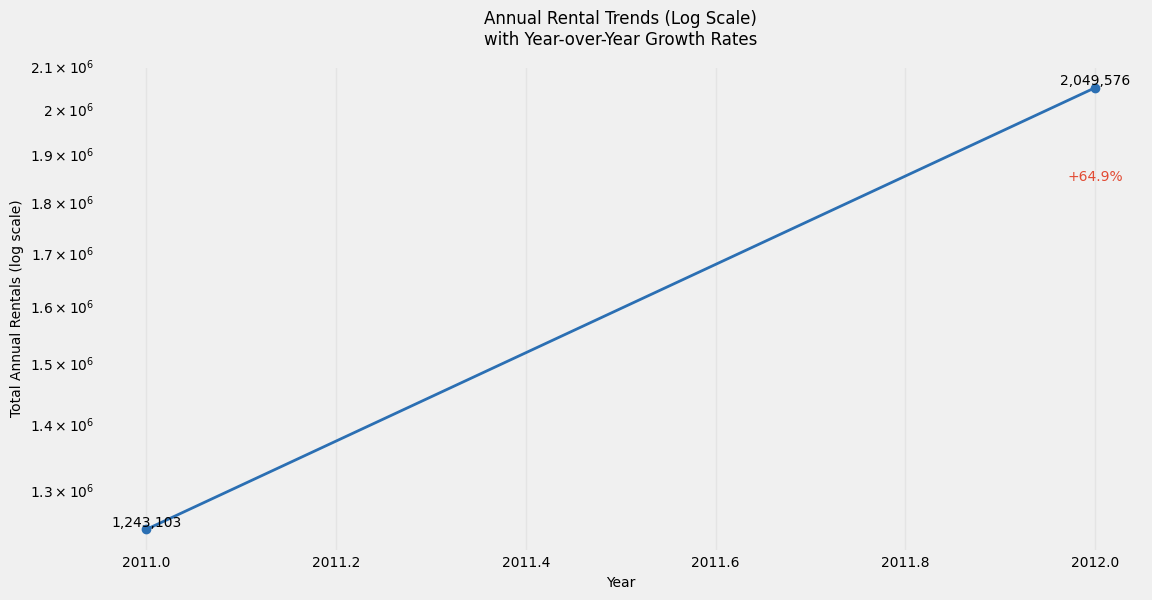

In [15]:
yearly_rentals = data.groupby(data["dteday"].dt.year)["cnt"].sum()
yearly_growth = yearly_rentals.pct_change() * 100

plt.figure(figsize=(12, 6))
plt.semilogy(
    yearly_rentals.index,
    yearly_rentals.values,
    "o-",
    color=COLORS["primary"],
    linewidth=2,
)

for i in range(len(yearly_rentals)):
    value = yearly_rentals.values[i]
    plt.text(yearly_rentals.index[i], value, f"{value:,.0f}", ha="center", va="bottom")
    if i > 0:
        growth = (value / yearly_rentals.values[i - 1] - 1) * 100
        plt.text(
            yearly_rentals.index[i],
            value * 0.9,
            f"+{growth:.1f}%",
            ha="center",
            color=COLORS["secondary"],
        )

plt.title(
    "Annual Rental Trends (Log Scale)\nwith Year-over-Year Growth Rates",
    fontsize=12,
    pad=15,
)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Total Annual Rentals (log scale)", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


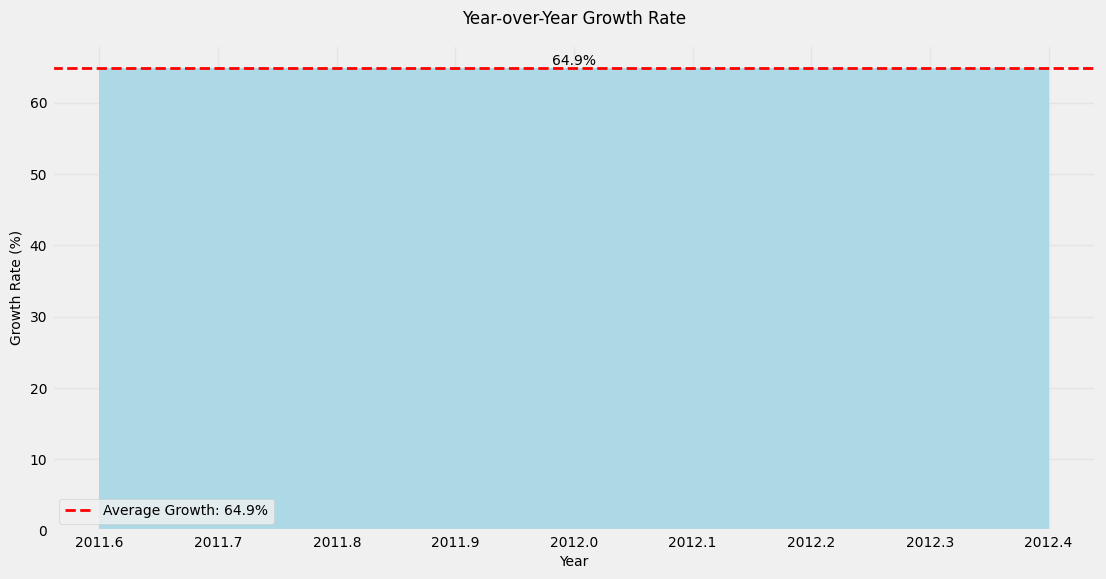

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_growth.index, yearly_growth.values, color="lightblue")
plt.axhline(
    y=yearly_growth.mean(),
    color="r",
    linestyle="--",
    label=f"Average Growth: {yearly_growth.mean():.1f}%",
)

for i, v in enumerate(yearly_growth):
    plt.text(
        yearly_growth.index[i],
        v,
        f"{v:.1f}%",
        ha="center",
        va="bottom" if v > 0 else "top",
    )

plt.title("Year-over-Year Growth Rate", fontsize=12, pad=15)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Growth Rate (%)", fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Long-term Growth Insights:**
- Clear upward trend in total rentals
- Year-over-year growth patterns
- Implications for future capacity planning

### 3.3 User Type Evolution

/tmp/ipykernel_155762/4000390427.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users = data.resample("M", on="dteday").agg(


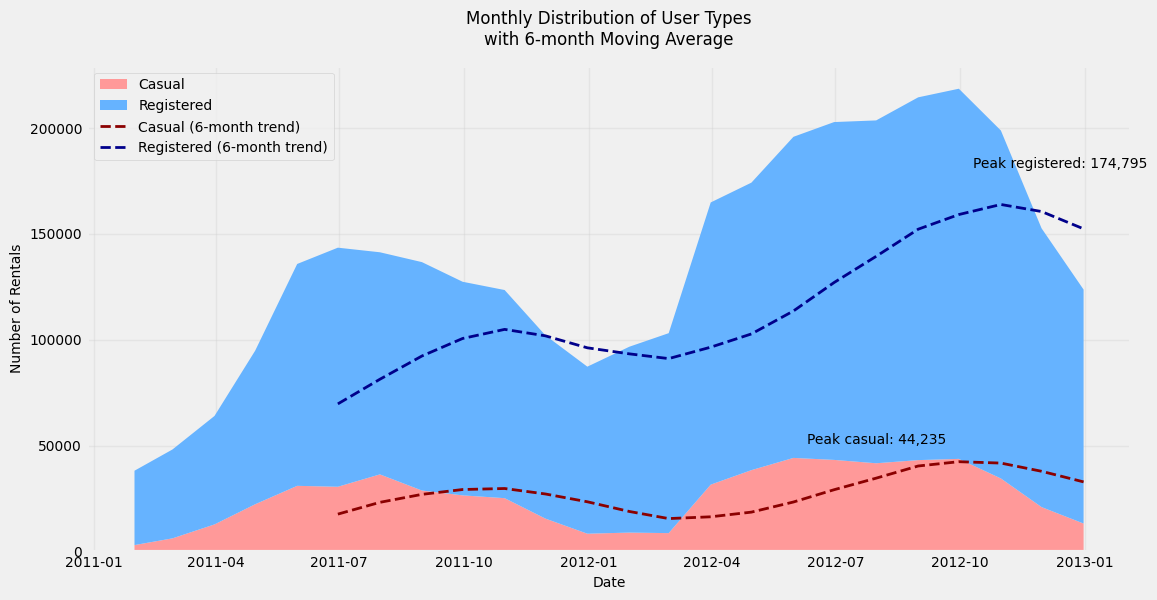

In [17]:
monthly_users = data.resample("M", on="dteday").agg(
    {"casual": "sum", "registered": "sum"}
)

plt.figure(figsize=(12, 6))
plt.stackplot(
    monthly_users.index,
    [monthly_users["casual"], monthly_users["registered"]],
    labels=["Casual", "Registered"],
    colors=[COLORS["casual"], COLORS["registered"]],
)

casual_trend = monthly_users["casual"].rolling(window=6).mean()
registered_trend = monthly_users["registered"].rolling(window=6).mean()
plt.plot(
    monthly_users.index,
    casual_trend,
    "--",
    color="darkred",
    label="Casual (6-month trend)",
)
plt.plot(
    monthly_users.index,
    registered_trend,
    "--",
    color="darkblue",
    label="Registered (6-month trend)",
)

plt.title(
    "Monthly Distribution of User Types\nwith 6-month Moving Average",
    fontsize=12,
    pad=15,
)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Number of Rentals", fontsize=10)

max_casual = monthly_users["casual"].max()
max_registered = monthly_users["registered"].max()
plt.annotate(
    f"Peak casual: {max_casual:,.0f}",
    xy=(monthly_users["casual"].idxmax(), max_casual),
    xytext=(10, 10),
    textcoords="offset points",
)
plt.annotate(
    f"Peak registered: {max_registered:,.0f}",
    xy=(monthly_users["registered"].idxmax(), max_registered),
    xytext=(10, 10),
    textcoords="offset points",
)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

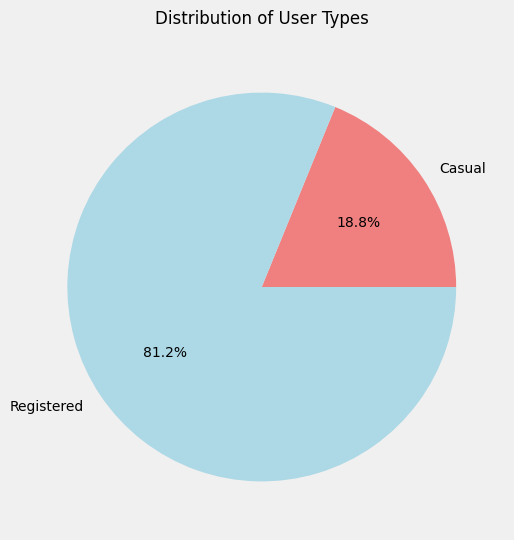

In [18]:
user_ratio = data[["casual", "registered"]].sum()
plt.figure(figsize=(10, 6))
plt.pie(
    [user_ratio["casual"], user_ratio["registered"]],
    labels=["Casual", "Registered"],
    autopct="%1.1f%%",
    colors=["lightcoral", "lightblue"],
)
plt.title("Distribution of User Types", fontsize=12, pad=15)
plt.show()

**User Type Evolution Insights:**
- Registered users form the majority of rentals
- Growth patterns differ between user types
- Seasonal variations in user type distribution
- Implications for membership programs and marketing strategies

## Summary and Recommendations


### Key Findings:
1. Weather Impact
   - Clear weather conditions optimal for rentals
   - Temperature strongly influences rental numbers
   - Seasonal patterns affect user behavior

2. Usage Patterns
   - Distinct patterns between working and non-working days
   - Clear peak usage periods identified
   - Different behaviors between casual and registered users

3. Future Growth
   - Strong upward trend in overall rentals
   - Seasonal variations consistent year over year
   - Growing proportion of registered users

### Recommendations:
1. Resource Optimization
   - Adjust bike availability based on weather forecasts
   - Implement dynamic allocation between locations
   - Plan maintenance during low-usage periods

2. User Experience
   - Different strategies for casual vs registered users
   - Focus on converting casual to registered users
   - Weather-based promotional strategies

3. Growth Planning
   - Prepare for continued growth in demand
   - Consider seasonal capacity requirements
   - Focus on peak period management